<a href="https://colab.research.google.com/github/erumenaezimano/May-2022-WaiXCollins-Airplane-Crash-Investigation/blob/main/Boeing_%26_Airbus_Crash_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
#df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')
df=pd.read_pickle("https://github.com/women-in-ai-ireland/May-2022-WaiXCollins-Airplane-Crash-Investigation/raw/main/dataset/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.pkl")

In [3]:
df.shape

(4967, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4193 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

In [5]:
df.head()
#df.tail(5)

Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  09/07/1909    NaN             Juvisy-sur-Orge, France   
2  07/12/1912  06:30           Atlantic City, New Jersey   
3  08/06/1913    NaN  Victoria, British Columbia, Canada   
4  09/09/1913  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   

  Registration cn/ln  Aboard  Aboard Passangers  Aboard Crew  Fatalities  \
0          NaN     1     2.0                1.0          1.0         1.0   
1          SC1   NaN     1.0                0.0          1.0         1.0   
2          NaN   NaN     5.0                0.0          5.0         5.0   
3          NaN   NaN     1.0                0.0          1.0         1.0   
4          NaN   NaN    20.0                NaN          NaN        14.0   

   Fatalities Passangers  Fatalities Crew  Ground  \
0                    1.0              0.0     0.0   
1                    0.0              0.0     0.0   
2                    0.0              5.0     0.0   
3                    0.0              1.0     0.0   
4                    NaN              NaN     0.0   

                                             Summary  \
0  During a demonstration flight, a U.S. Army fly...   
1  Eugene Lefebvre was the first pilot to ever be...   
2  First U.S. dirigible Akron exploded just offsh...   
3  The first fatal airplane accident in Canada oc...   
4  The airship flew into a thunderstorm and encou...   

                                            geopyLoc geopyRoute  
0  (North Fort Myer Drive, Rosslyn, Arlington, Ar...       None  
1  (Juvisy-sur-Orge, Palaiseau, Essonne, Ile-de-F...       None  
2  (Atlantic City, Atlantic County, New Jersey, 0...       None  
3  (Victoria, Capital Regional District, British ...       None  
4     (North Sea, (56.74123355, 2.8911717166880475))       None

In [6]:
#renamed column
df.rename(columns = {'geopyLoc':'Coordinates', 'geopyRoute':'Route_Coordinates'}, inplace = True)

df.columns=df.columns.str.replace(' ','_')

#EDA

In [7]:
#convert Year variable to datetime format
df["Year"]=pd.to_datetime(df.Date).dt.year

In [8]:
#find missing values
total = df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(17)

Total    Percent
Flight_#                3652  73.525267
Time                    1510  30.400644
Route_Coordinates       1333  26.837125
Coordinates              864  17.394806
Route                    774  15.582847
cn/ln                    668  13.448762
Registration             273   5.496275
Fatalities_Passangers    242   4.872156
Fatalities_Crew          241   4.852023
Aboard_Passangers        229   4.610429
Aboard_Crew              226   4.550030
Summary                   64   1.288504
Ground                    41   0.825448
Aboard                    18   0.362392
AC_Type                   15   0.301993
Operator                  10   0.201329
Fatalities                 8   0.161063

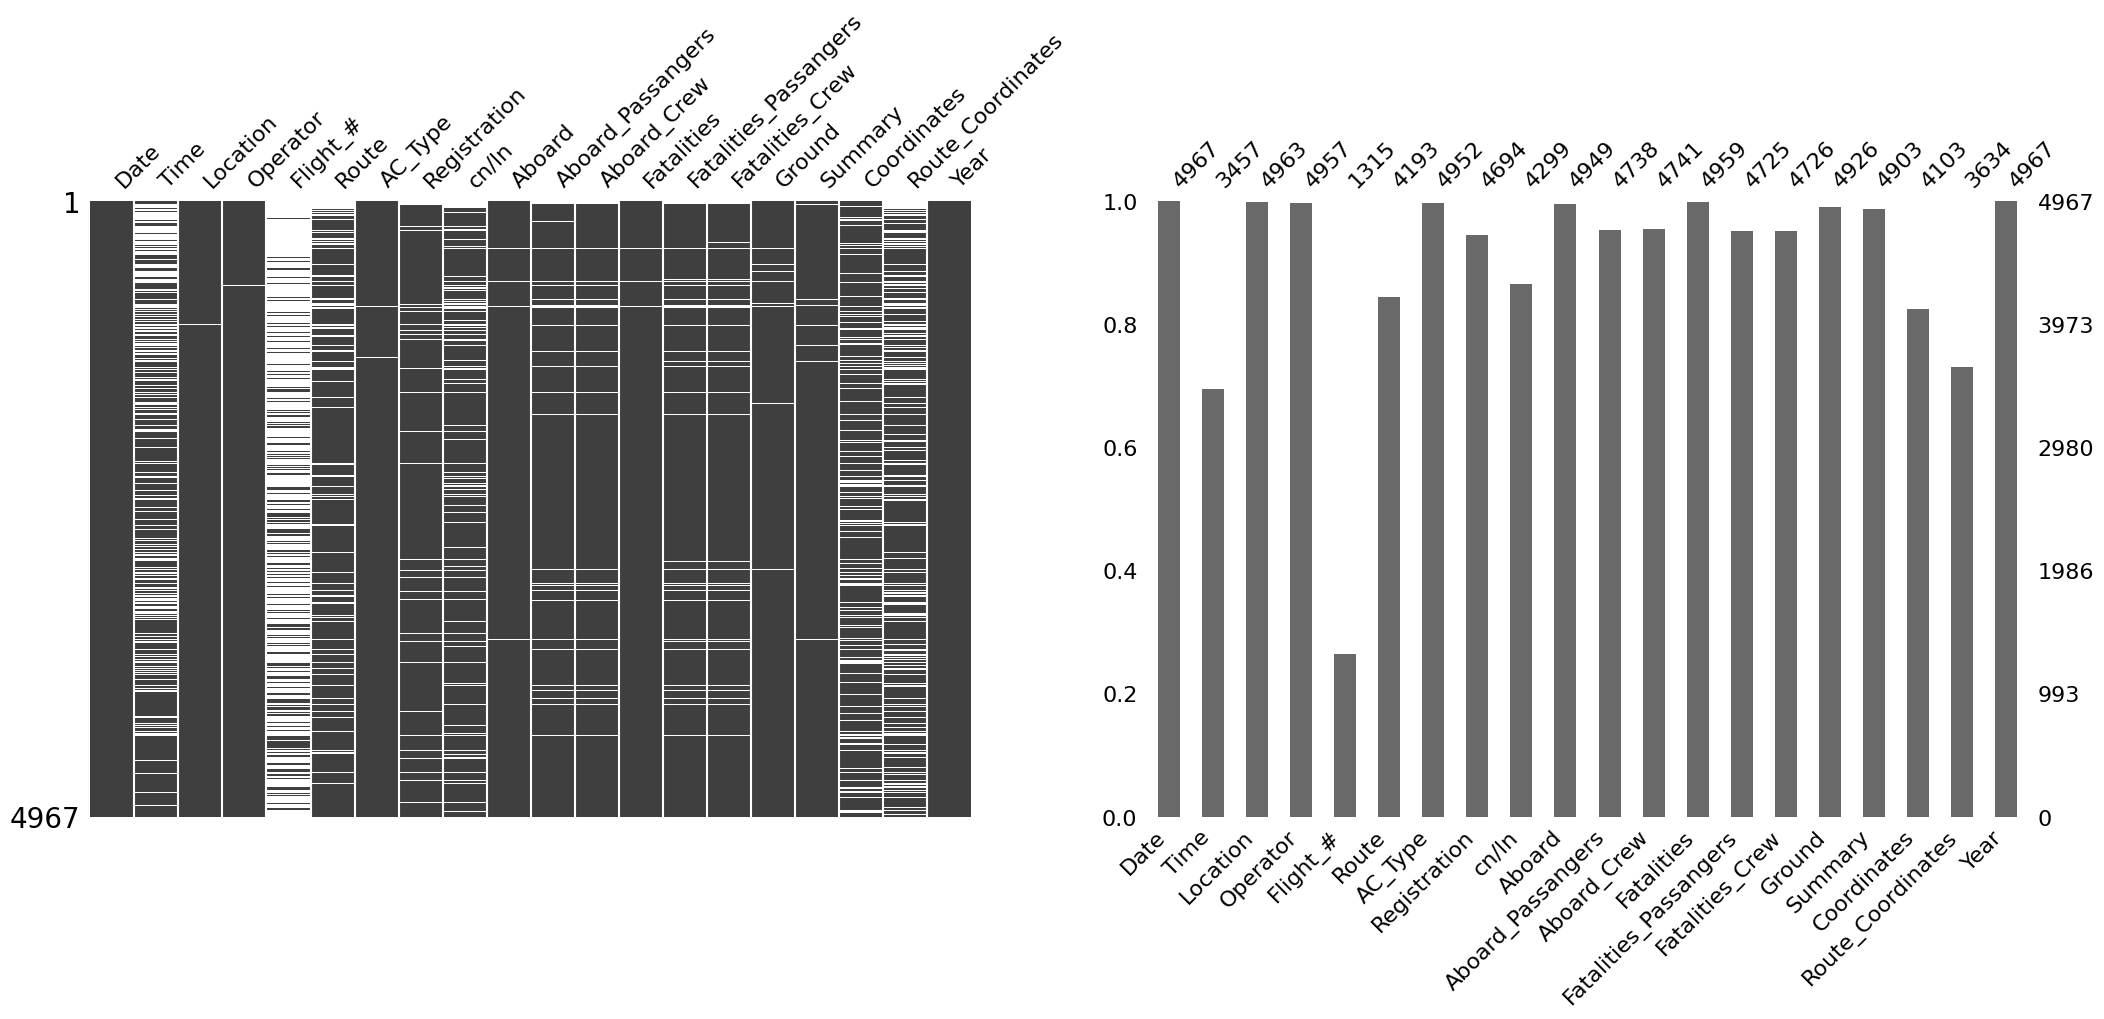

In [9]:
fig, axs = plt.subplots(1,2,figsize=(25, 8))
msno.matrix(df, labels=True,ax=axs[0],figsize=(10, 4));
msno.bar(df, labels=True,ax=axs[1],figsize=(10, 4));
plt.show()

In [10]:
#investigation of non-numeric variables
df.describe(exclude="number")

Date   Time        Location  Operator Flight_#     Route  \
count         4967   3457            4963      4957     1315      4193   
unique        4539   1062            4101      2242      883      3800   
top     08/31/1988  15:00  Moscow, Russia  Aeroflot        -  Training   
freq             4     37              17       255       36        92   

             AC_Type Registration cn/ln                               Summary  \
count           4952         4694  4299                                  4903   
unique          2447         4661  3869                                  4808   
top     Douglas DC-3           49     1  Crashed under unknown circumstances.   
freq             333            3     8                                     9   

                                              Coordinates  \
count                                                4103   
unique                                               2918   
top     (Moscow, Central Federal District, Russia, (55...   
freq                                                   28   

                                        Route_Coordinates  
count                                                3634  
unique                                               3369  
top     [(São Paulo, Região Imediata de São Paulo, Reg...  
freq                                                    7

Aboard  Aboard_Passangers  Aboard_Crew   Fatalities  \
count  4949.000000        4738.000000  4741.000000  4959.000000   
mean     31.088301          26.898691     4.479646    22.338173   
std      45.438282          44.010591     3.489021    35.026176   
min       0.000000           0.000000     0.000000     0.000000   
25%       7.000000           3.000000     2.000000     4.000000   
50%      16.000000          12.000000     4.000000    11.000000   
75%      35.000000          30.000000     6.000000    25.000000   
max     644.000000         614.000000    61.000000   583.000000   

       Fatalities_Passangers  Fatalities_Crew       Ground         Year  
count            4725.000000      4726.000000  4926.000000  4967.000000  
mean               19.017566         3.579348     1.728177  1970.679082  
std                34.114849         3.170223    55.708966    24.556593  
min                 0.000000         0.000000     0.000000  1908.000000  
25%                 1.000000         2.000000     0.000000  1951.000000  
50%                 8.000000         3.000000     0.000000  1970.000000  
75%                21.000000         5.000000     0.000000  1991.000000  
max               560.000000        46.000000  2750.000000  2019.000000

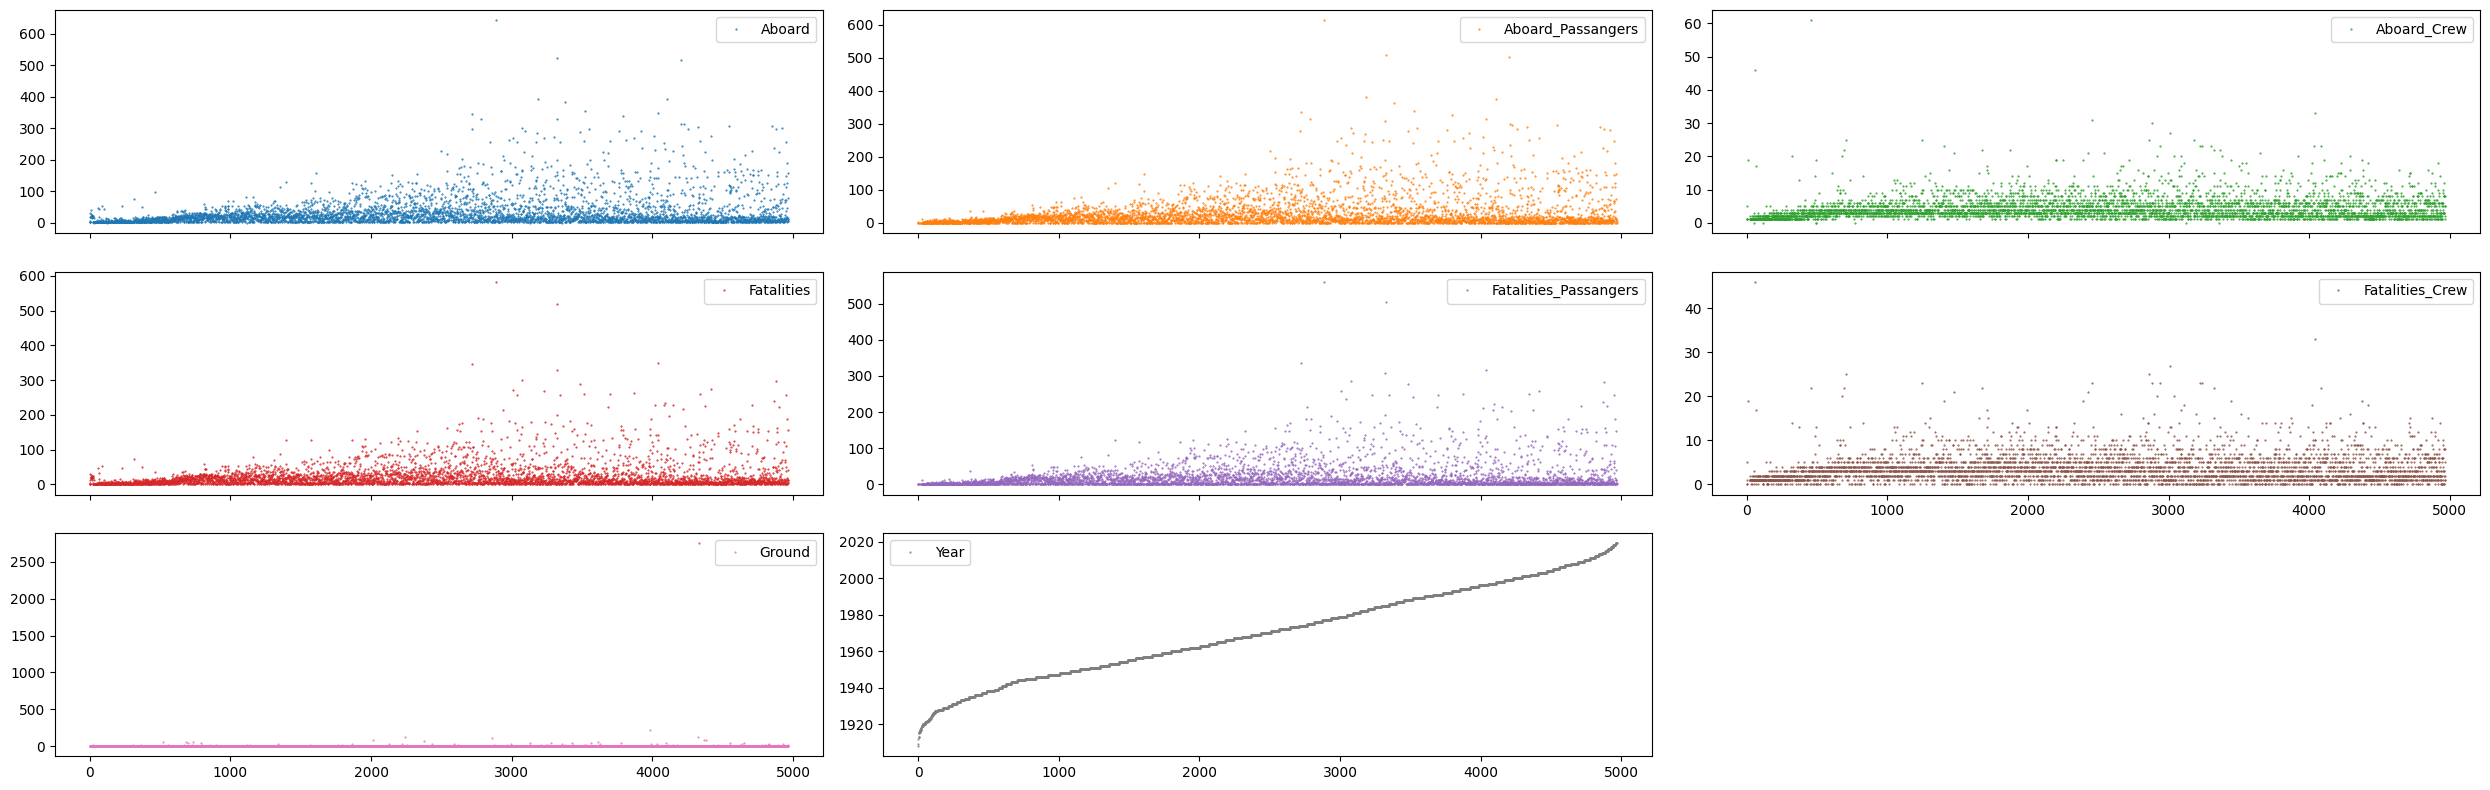

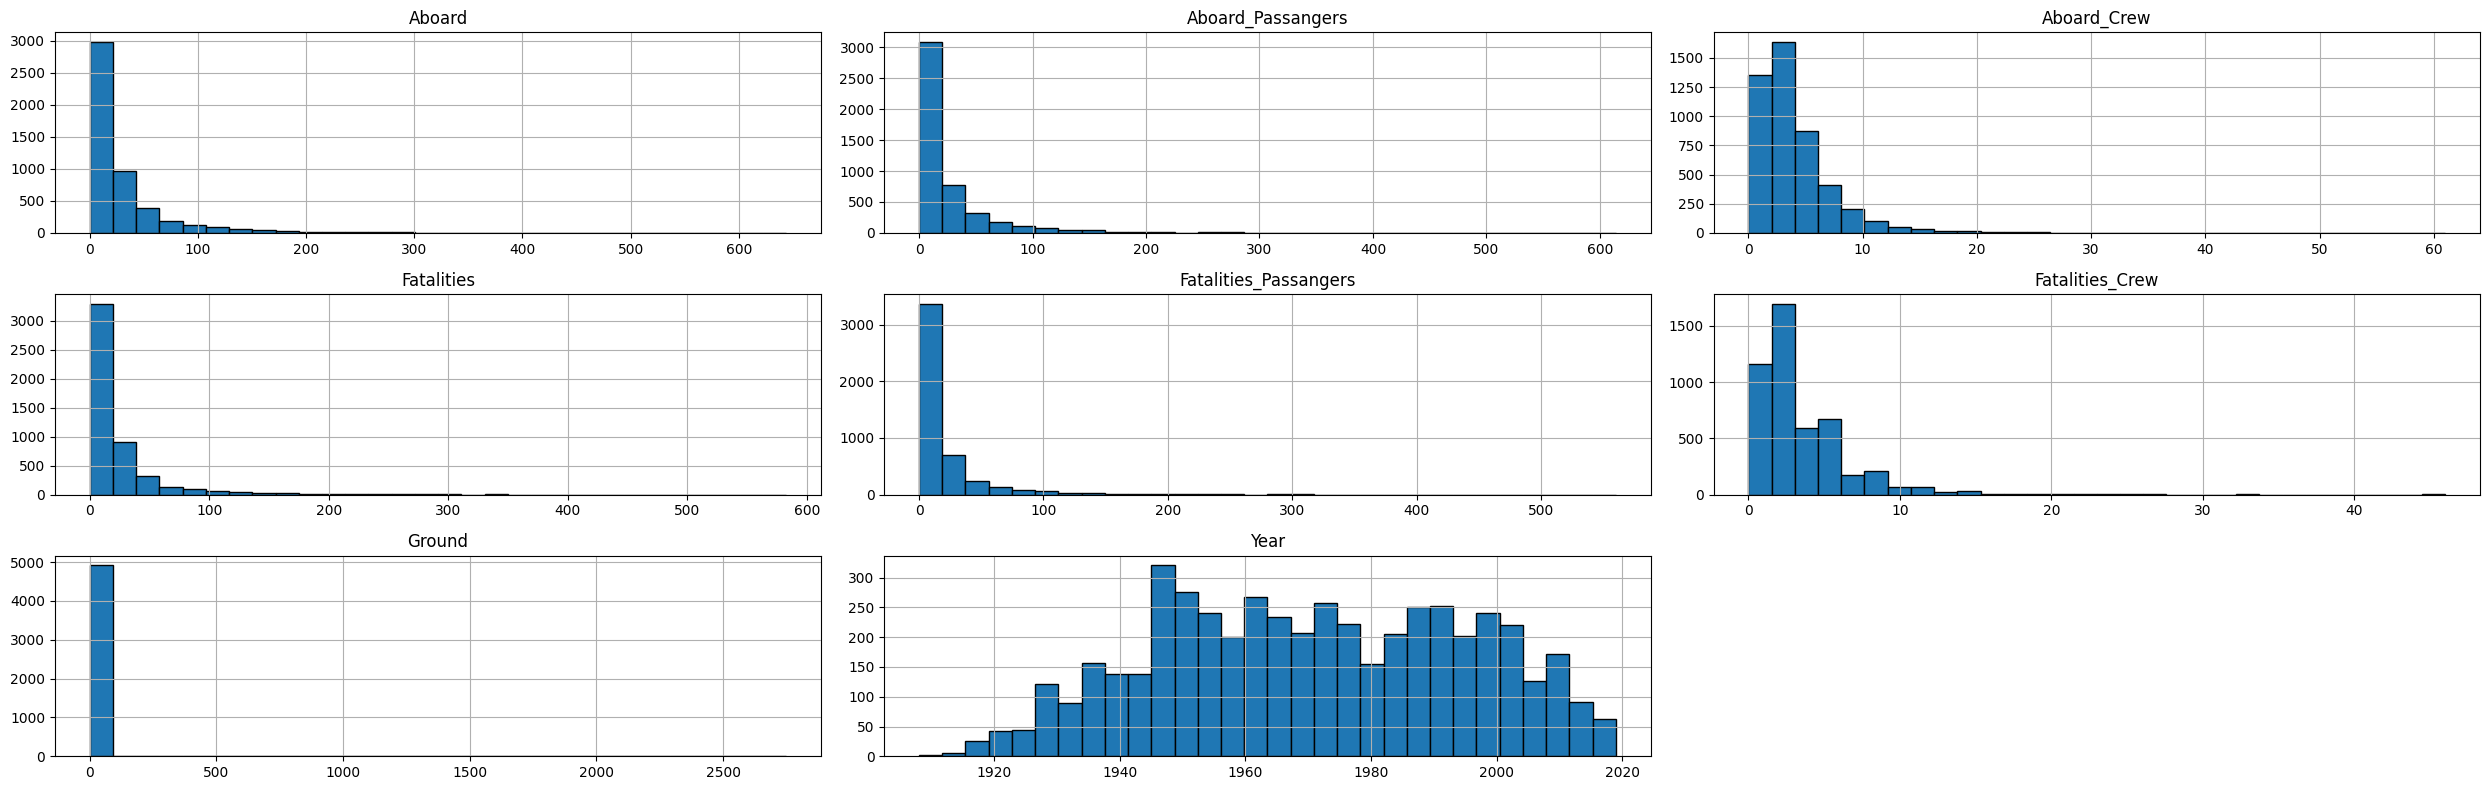

In [11]:
#global view of numeric variables of the dataset
df.plot(lw=0,marker=".",subplots=True,layout=(3,3),figsize=(25,8),markersize=1)
plt.tight_layout();

#plot histogram to detect outliers
df.hist(bins=30, figsize=(25, 8), layout=(3,3), edgecolor="black")
plt.tight_layout();

df.describe(include="number")

an outlier was detected in the Ground variable, which could be related to the 9/11 incident

#Create a new variable to categorise aircraft operators

In [12]:
#list operators of aircraft
#operators = df.Operator.unique()
operators = df.Operator.value_counts()
operators

Aeroflot                                   255
Military - U.S. Air Force                  140
Air France                                  72
Deutsche Lufthansa                          63
United Air Lines                            44
                                          ... 
Houston Metro Airlines                       1
Wenela Air Services                          1
Sierra Pacific Airlines                      1
Pathet Lao Airlines                          1
Aeroflot Russian International Airlines      1
Name: Operator, Length: 2242, dtype: int64

In [13]:
#create categories of aircraft operators from the operators column based on their services
df["Operator_Category"] ="Other"

Operator_Cat = {"Military":["Military","military","Army","Air Force","Airforce", "Force","Police","Fuerza","Defense","Guardia","TAM","Self-Defence"],
         "Airline":["Airline*","Air Line*","AirNow", "Airway*","Aerolineas","Aerocalifornia", "Loide","Swissair", "Avesca", "Air","Pacific","Aerotransport","Alantis","ACES","Airborne","Linea*","Agni","Alaska","Airquarius",
                    "Austria","ADES","Aigle", "ATI","Australian","Aer Lingus", "Airwave","Alia", "National Air Transport", "Aer Turas","Alas","Colombia","Aeralpi","Air-Lift","Alitalia","Aviaimpex","Aereo*","Alyemda","Aeroflot",
                    "Airlink*","Amee","Aviaco", "Aero*","Flyers","Ameriflight", "Aerocaribbean","Ansett", "Avianca", "Aerocaribe","Airtech","Ararat","Aerochasqui","Airwork","Arctic","Alfa","Armavia","Aeroco*","Airfast","Flydubai",
                    "Aviastar","Agencia","Spirit", "Aviateca","Congo","Travel", "Associated","Aviation", "Commuter", "Akhal","Avensa","Avis","Flight","Ala","Aviogenex","Avistar","Aerolinie","Aerea","Avisto","Channel","Filair","Gabon",
                    "Balair","Dominicana","Biman", "Civil","Cubana","Emirates", "Flug","Comair", "Airlinex", "Finnair","Nordair","Savanair","Savannair","Bazair","Compagnie","Ecuatair","Aire","Linhas","Binter","Compania","Ecuato","Garamut",
                    "Fragtflug","Prinair","BOAC", "Condor","E.A.S","Empressa", "Empresa","Nordeste", "Bodensee", "Connair","Egyptair","Panair","Talair","Braathens","Continental","Eurasia","Martinair","Servicio*","Britavia","Conviasa","ELK",
                    "Italilia","Misair","Sibir", "Bulair","Crossair","Enimex", "Farnair","Misrair", "SilkAir", "Calair","Dan-Air","Fairflight","Faucett","Palair","Skyline","Carvair","Deutche","Fairways","Fujita","Pakair","Transair","Montserrat",
                    "Transasia","Germanwings","Airlink", "Grand Canyon","Union","Grands", "Guicango","Handley", "Khong", "Qantas","United","Ibertrans","Icelandair","Inair","Inex","Propair","Aviacion","Interflug","IrAvia","Itavia","Jamair",
                    "Kamchatka","Skyways","Kata", "Khors","Quebecair","United", "USAir","UTAir", "Vanair", "Komi","LACSA","Ladeco","Lambair","Lineas","Linee","Lionair","Lloyd","Loganair","Onzeair","LOT","Lufthansa",
                    "Luxair","Nationair"],
         "Private":["Private", "Charter", "Jet*", "Leasing", "Dai Nippon","India","AE Aviation","Corp","AIDA","CAMBA","Airbus","CATC","Airwork","CATA","Aeronautical","IRS","Allied","CNAC","Alpha","Astro","Chamberlin",
                    "Alpine","Autrex","Circuit","Ambler","Caproni","Havilland","Eagle","Boeing","Maniema","Express","Bombardier","Cruzeiro","Bristol","Airtour*","Curtiss","ANDESA","Aircraft","Devlet","Angel","Business",
                    "Electricity","APRL","Butler","Golden","Arall","CAAC","Classic","Douglas","Aramar","CAAK","Aramaco","Cable","Dakota","AREA","Flying","Embry","Flightline","Emery","Fokker","Evolga","Ford","Funds",
                    "Freedom","FAMA","Frontier","Falcon","Gambcrest","Hydro","Gander","GCI","Great Lakes","Government","Hageland","Hamilton","Club","Harrington's","Heart","Living","Herfurtner","Horizon","Medical","Hoseba",
                    "Indamer","Control","Security","Jetcom","Shell","Johnson","Fire","Company","ValuJet","Kiev","Knowles","LAMIA","Acres","Air Ambulance","Med","Metrojet","Missionary","Mission","Mustang","United Nations","University"],
         "Cargo":["FedEx","Cargo","Air Cargo","Ababeel","Federal Express","Tiger","Aca-Ancargo","Golden Star","Juba","Regina","Freight","Parcel","Export","Atran","Carga","Cargolux", "Mail Services", "Aeropostale"],
         "Air_Taxi":["Helicopter*", "Heli", "Helikopter*","Taxi","Air Taxi", "Aerotaxi","Heliandes","Helicsa","HeliCusco","Hevlift","Cityhopper"]
  }

for op_cat in Operator_Cat:
  filter=df["Operator"].str.contains('|'.join(Operator_Cat[op_cat]),case=False,regex=True,na=False)
  df.loc[filter, "Operator_Category"] = op_cat

Six operators categories were created from the original operator variable based on the services of the operators.

In [14]:
cat = df.Operator_Category.value_counts()
cat

Airline     3639
Private      552
Other        381
Military     174
Cargo        114
Air_Taxi     107
Name: Operator_Category, dtype: int64

In [15]:
!pip install seaborn==0.10.1

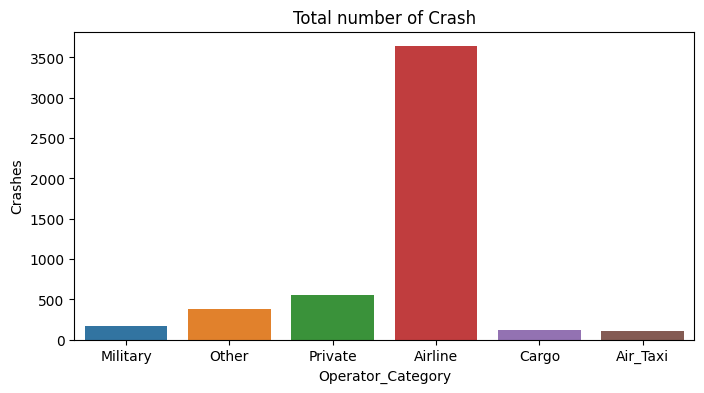

In [16]:
#total number of crashes for each operator category
plt.figure(figsize=(7,4))
sns.countplot(data=df,x='Operator_Category')
plt.title('Total number of Crash')
plt.ylabel('Crashes');

From the visualisation, Airline category has the highest number of accidents

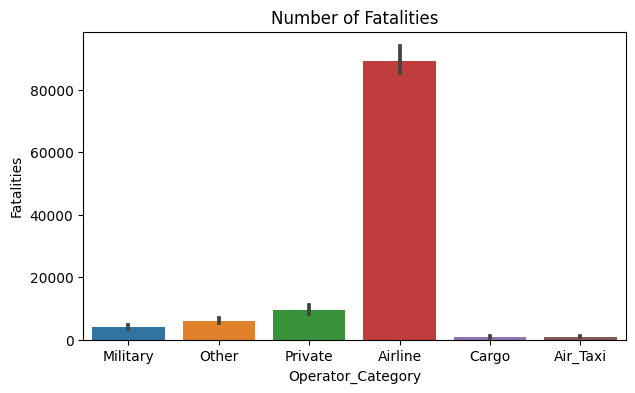

In [17]:
#Total number of fatalities for each operator category
plt.figure(figsize=(7,4))
ax = sns.barplot(x='Operator_Category', y='Fatalities', data=df, estimator=sum)
plt.title('Number of Fatalities');

From the visualisation, airline category has more fatalities compared to other categories

#Categories the Aircrafts based on their manufacturers

In [18]:
#Aicraft type is categorised based on manufacturers
df["Manufacturer"] ="Other"

Aircraft_Cat = {"Zeppelin":["Zeppelin"],
         "Wright Brothers":["Wright"],
         "Dirigible":["Dirigible"],
         "Curtiss":["Curtiss","Curtis"],
         "De Havilland":["De Havilland"],
         "Farman":["Farman"],
         "Handley":["Handley", "Page"],
         "Junkers":["Breguet"],
         "Bleriot":["Bleriot"],
         "Fokker":["Fokker"],
         "Caudron":["Caudron"],
         "Sikorsky":["Sikorsky"],
         "Douglas":["Douglas", "Dougals", "Mc Donnel", "McDonnell"],
         "Dornier":["Dornier"],
         "Fairchild":["Fairchild"],
         "Boeing":["Boeing"],
         "Avro":["Avro"],
         "Bristol":["Bristol"],
         "Spad":["Spad"],
         "Olivier":["Olivier"],
         "Fokker":["Fokker"],
         "Latecoere":["Latecoere"],
         "Ford":["Ford"],
         "Vickers":["Vickers"],
         "Stinson":["Stinson"],
         "Lockheed":["Lockheed"],
         "Antonov":["Antonov"],
         "Savoia":["Savoia"],
         "Consolidated":["Consolidated"],
         "Short":["Short"],
         "Grumman":["Grumman"],
         "Cessna":["Cessna"],
         "Yakovlev":["Yakovlev"],
         "Beechcraft":["Beechcraft", "Beech"],
         "Tupolev":["Tupolev"],
         "Embraer":["Embraer"],
         "Mil Mi":["Mil Mi","Mi", "MiG"],
         "Airbus":["Airbus","Eurocopter"],
         "Britten Norman":["Britten Norman","Pilatus"],
         "Hawker":["Hawker"],
         "Aero Commander":["Aero Commander"],
         "Ilyushin":["Ilyushin"],
         "Aerospatiale":["Aerospatiale", "Nord"],
         "ATR":["ATR"],
         "BAC":["BAC"],
         "Bell":["Bell"],
         "British Aerospace":["British Aerospace", "BAe"],
         "CASA":["CASA", "Aviocar"],
         "Convair":["Convair"],
         "Dassault":["Dassault"],
         "GAF Nomad":["GAF Nomad"],
         "Learjet":["Gates", "Learjet", "Lear"],
         "Let":["Let"],
         "NAMC":["NAMC"],
         "Piper":["Piper"],
         "Syberjet":["Swearingen"],
         "Sud Aviation Caravelle":["Sud Aviation Caravelle"],
         "Bombardier":["Bombardier", "Canadair"]
  }


for ac_cat in Aircraft_Cat:
  filter=df["AC_Type"].str.contains('|'.join(Aircraft_Cat[ac_cat]),case=False,regex=True,na=False)
  df.loc[filter, "Manufacturer"] = ac_cat

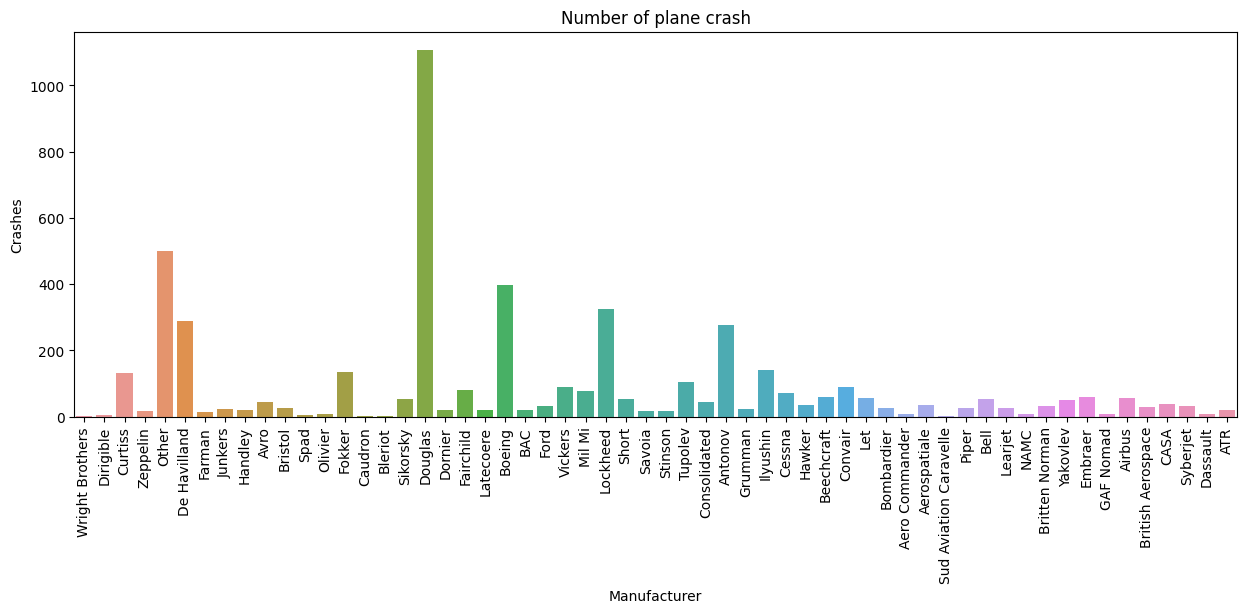

In [26]:
#visualise number of crashes based on aircraft manufacturer
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Manufacturer')
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.title('Number of plane crash')
plt.ylabel('Crashes');

From the visualisation, Douglas aircrafts had the highest number of accidents

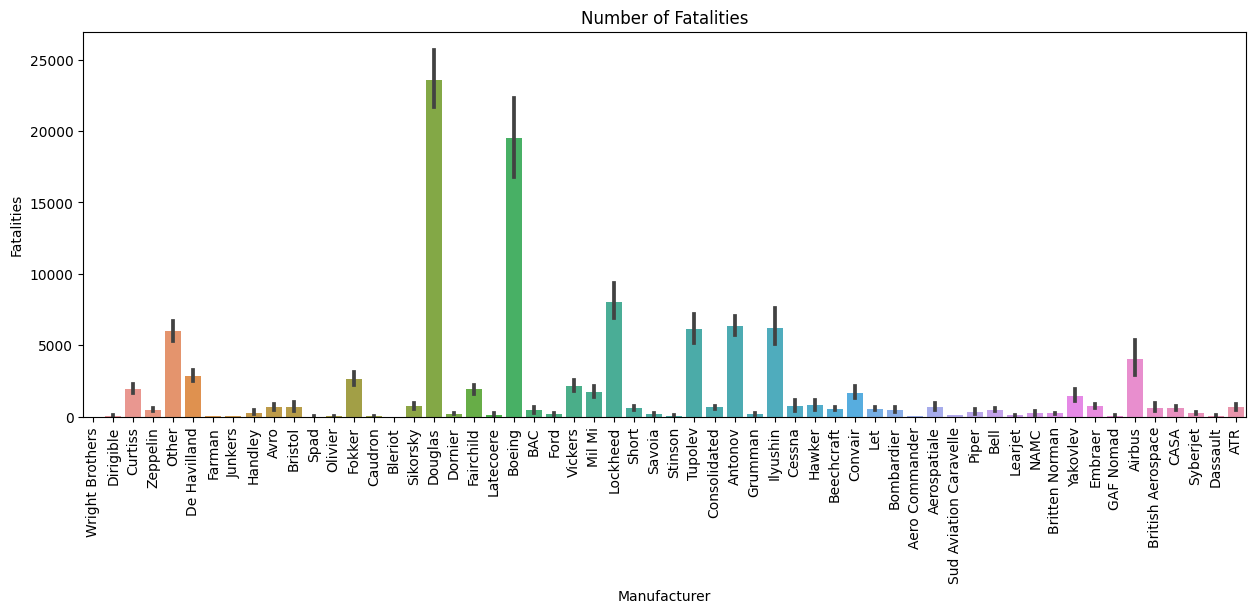

In [27]:
#visualise number of fatalities based on aircraft manufacturer
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Manufacturer', y='Fatalities', data=df, estimator=sum)
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.title('Number of Fatalities');

From the visualisation, Douglas and Boeing aircrafts has the highest number of fatalities

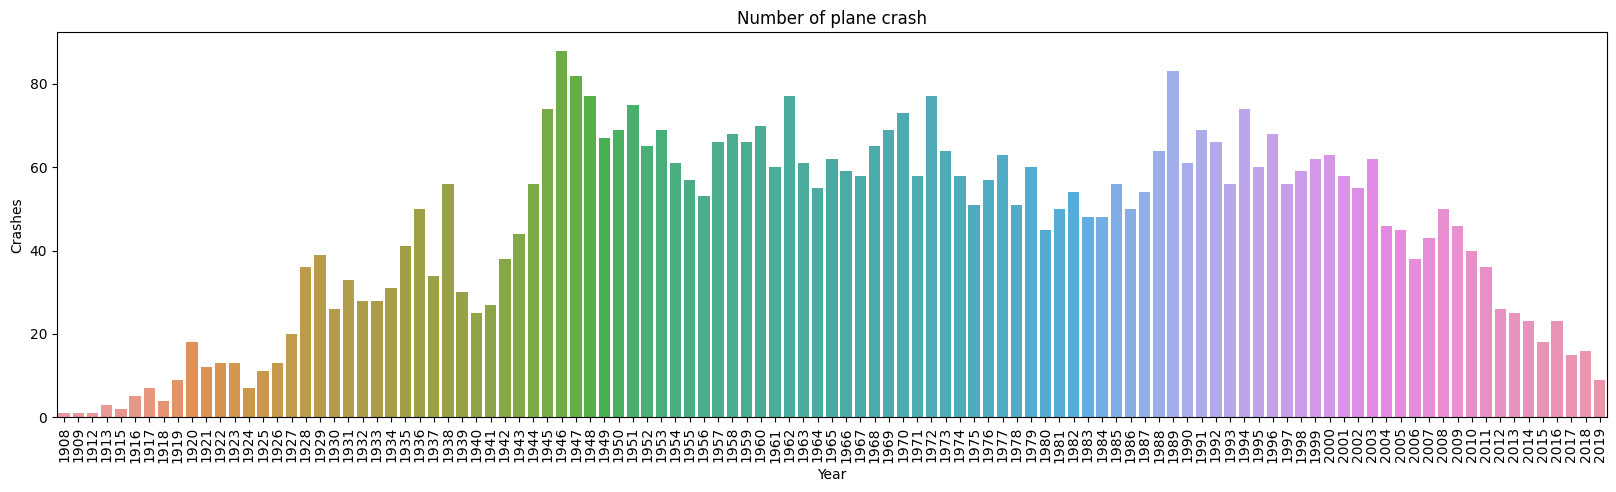

In [28]:
#visualise annual aircraft crash to gain more insights into the crash
plt.figure(figsize=(20,5))
sns.countplot(data=df,x='Year')
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.title('Number of plane crash')
plt.ylabel('Crashes');

1946, had the most air accidents

In [29]:
#extracting douglas aircraft to investigate more, as they had the highest crash
douglas = df[df['Manufacturer']=='Douglas']
douglas.Manufacturer.value_counts()
#douglas.Year.value_counts()

Douglas    1107
Name: Manufacturer, dtype: int64

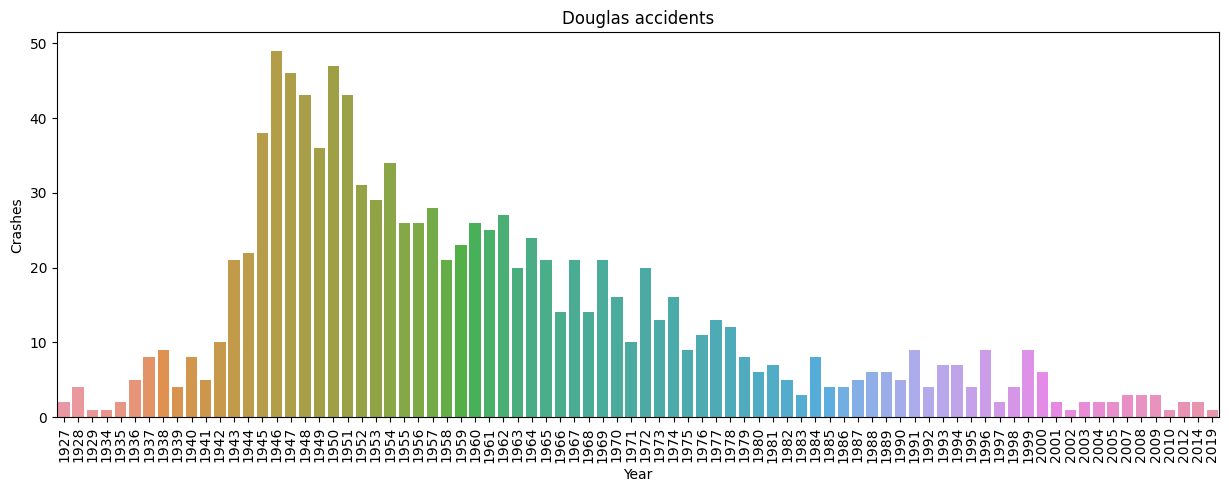

In [30]:
#visualisation of annual douglas air crash
plt.figure(figsize=(15,5))
sns.countplot(data=douglas,x='Year')
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.title('Douglas accidents')
plt.ylabel('Crashes');

Douglas experienced most of its crashes between 1945 and 1951

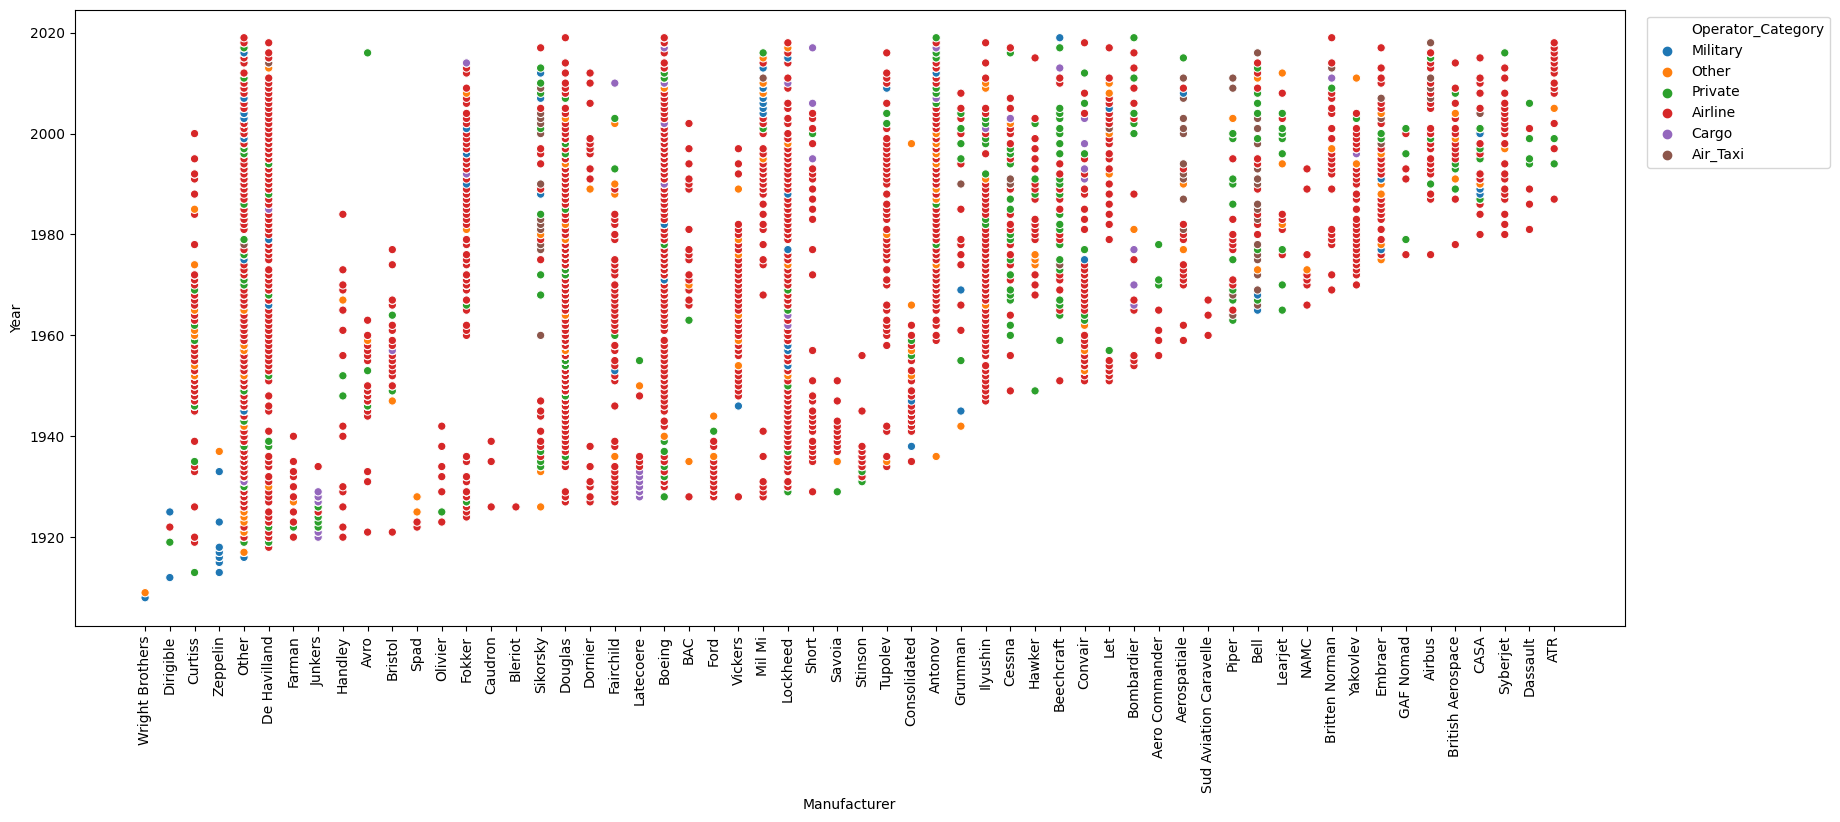

In [32]:
#Scatterplot to visualise annual air crashes based on manufacturer
var = "Year"
data = pd.concat([df["Manufacturer"],df[var]], axis=1)
plt.figure(figsize=(20,8))
sns.scatterplot(x="Manufacturer",y="Year", data=df, hue = "Operator_Category")
locs, labels=plt.xticks()
plt.setp(labels,rotation=90)
plt.legend(bbox_to_anchor=(1.01,1));

This scatterplot shows that most crashes involve airlines, while Zeppelin aircraft crashes were predominantly military-related.

#Categorise aircraft accidents by time of the day the aircrafts crashed

In [33]:
#Accidents binned according to the time of day it happened
bins = [0,5,12,18,24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df["Hour"] = pd.to_datetime(df.Time, errors ='coerce').dt.hour
df["Time_of_Day"]=pd.cut(df["Hour"], bins, labels=labels)

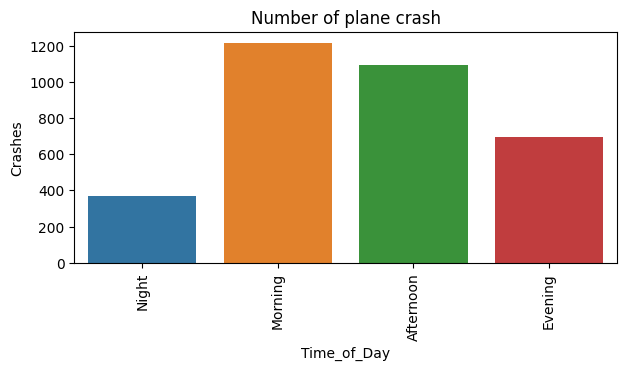

In [35]:
#visualise the number of crashes based on the time of day
plt.figure(figsize=(7,3))
sns.countplot(data=df,x='Time_of_Day')
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.title('Number of plane crash')
plt.ylabel('Crashes');

The visualisation shows that most of the accidents occured in the morning

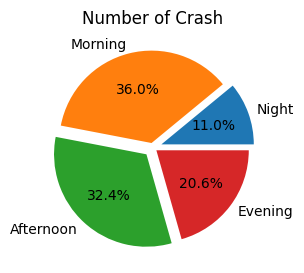

In [37]:
#pie chart to show the percentage of the crashes
plt.figure(figsize=(6,3))
df.groupby("Time_of_Day").size().plot.pie(autopct='%0.1f%%',
explode=(0.1,0.05, 0.1, 0.05),title="Number of Crash")
plt.show()

#A new dataset will be created containing only Boeing and Airbus aircrafts

In [38]:
#create a new dataset with only boeing and airbus aircrafts
manufacturer = ['Boeing', 'Airbus']
df_aircrafts = df[df["Manufacturer"].isin(manufacturer)]

In [41]:
#create a new column named aircraft_model for boeing and airbus
Bng_Bus_Type = {"Boeing Vertol":["Vertol CH-47","Vertol CH-47A","Vertol CH47B","Vertol CH-47C","Vertol CH47C","Chinook HC-2","Boeing CH-47","Boeing CH47A","Chinook"],
                "Boeing 40":["Boeing 40"],
                "Boeing 95":["Boeing 95"],
                "Boeing 221":["Boeing 221"],
                "Boeing 247":["Boeing 247","Boeing 247D","B-247-D"],
                "Boeing 314":["Boeing 314A","Boeing B-314"],
                "Boeing 707":["B-707-321B", "B-707-321C","B-707-331B","707-123","707-329C","707-321CF","707-331C","707-327C","707-373","707-360C",
                              "707-327C","707-324C","707-373C","707-336C","707-351C","707-328C","707-323C","707-330C","707-3J9C","B-707-320","B-707-123B",
                              "B-707-124","B-707-328","B-707-441","B-707-121","B-707-331","B-707-321B","B-707-124","B-707-121B","B-707-131B","B-707-437",
                              "B-707-436","B-707-131","B-707-138B","B-707-328C","B-707-465","B-707-344C","B-707-321B","B-707-328B","B-707-323","B-707-3D3C",
                              "B-707-345C","B-707-31","B-707-366C","B-707-326C","B-707-340C","B-707-309C","B-707-437","B-707-379C","B-707-3B5C","B-707-338C",
                              "B-707-349C","B-707-320F","B-707(E-3B)","B-707-323C","B-707-123B","B-707-3J9C"],
               "Boeing 720":["720-030B","B-720-040B","B-720-047B","B-720-051B","B-720B-023B"],
               "Boeing 727":["727-21","727-23F","727-243F","727-24C","727-286","727-2JOF","B-727","B-727-100","B-727-113C","B-727-121C","B-727-134","B-727-193","B-727-200",
                             "B-727-21","B-727-212A","B-727-214","B-727-22","B-727-223","B-727-224","B-727-225","B-727-227","B-727-228","B-727-22QC","B-727-23","B-727-230","B-727-231",
                             "B-727-232","B-727-235","B-727-247","B-727-251","B-727-256","B-727-264","B-727-27C","B-727-281","B-727-282","B-727-286","B-727-2A7","B-727-2D3","B-727-2F2",
                             "B-727-2H9A","B-727-2L5","B-727-30","B-727-46","B-727-64","B-727-81","B-727-86","B-727-92C","B-727-95"],
               "Boeing 737":["737-8KN","737-Max 8","737-200","737-201","737-230","737-236","737-286","737-2A1C","737-2B7","737-2D6C","737-2J8C","737-2M2","737-2R4C",
                             "737-31S","737-4Q8","737-53A","737-7H4","737-809","737-8AS","737-8BK","737-8F2","737-8HG","737-MAX 8","B-737-200","B-737-204","B-737-204C",
                             "B-737-209","B-737-210C(A)","B-737-219","B-737-222","B-737-230","B-737-230A","B-737-236","B-737-241","B-737-244","B-737-247","B-737-266",
                            "B-737-270C","B-737-275","B-737-281","B-737-282","B-737-291","B-737-297","B-737-2A1","B-737-2A8","B-737-2C3","B-737-2F9","B-737-4Q8","B-737-4Y0",
                             "B-737-505","B-737-566","B-737-5L9","B-737-73V","B-737-7H4","B-737-8AL","B-737-8EH","B-737-8GP","B-737-T43","B-737-2P5","B-737-3T0"],
                "Boeing 747":["747-244B-SF","747-246F","747-249F","747-2B5F","747-412F","B-747","B-747-121","B-747-121A","B-747-122","B-747-130","B-747-131","B-747-131","B-747-131F",
                             "B-747-168B","B-747-200","B-747-209B","B-747-209BSF","B-747-230B","B-747-237B","B-747-244B","B-747-258F","B-747-283B","B-747-2B5B","B-747-2R7F","B-747-300","B-747-412",
                              "B-747-428BCF","B-747-44AF","B-747-466","B-747-48EF","B-747-SP-09","B-747-SR46"],
                "Boeing 757":["757-204","757-N23","B-757-21B","B-757-200","B-757-222","B-757-223","B-757-225","B-757-23APF"],
                "Boeing 767":["767-223ER","767-375ER","767-200ER","767-222","767-233ER","767-260ER","767-366ER","767-3Z9ER"],
                "Boeing 777":["777-200","777-236ER","777-2H6ER","777-31H","777-28EER"],
                "Boeing Flying Fortress":["B-17F","B17G","B-17G"],
                "Boeing Stratoliner":["Stratoliner"],
                "Boeing Stratofreighter":["Stratofreighter"],
                "Boeing Stratocruiser":["Stratocruiser"],
                "Boeing Stratotanker":["C-97C","C-135B","C-135A","C-97","EC-135N","EC-135k","RC-135E","RC-135S","RC-135T","KC-135A","KC-135E","KC-135C","KC-135"],
                "Boeing Superfortress":["B-29","B-29A","B-29MR","XB-29","TB-29A","RB-52B"],
                "Airbus A300":["A300", "A.300B4-203","A300B2-203","A300B4-203","A300B4-622R","A300B2-1C","A300-B4-200","A300B2-101","A300-600R","A-300-605R","A300B4-203F","A300F-622R"],
                "Airbus A310":["A310-304", "A310-324","A-310-204","Airbus A310-304","A-310-324ET","A-310-324"],
                "Airbus A320":["A320-111", "A320-231","A320-211","A.320-214","A320-212","A-320-233","A320-232","A320-214","A-320-216"],
                "Airbus A321":["A321-231","A321-111"],
                "Airbus A330":["A330-321","A.330-301","A-330-243","A330-203","A330-202"],
                "Airbus A340":["A-340"],
                "Airbus Helicopter":["Eurocopter"]
  }

for air_cat in Bng_Bus_Type:
  filter=df_aircrafts["AC_Type"].str.contains('|'.join(Bng_Bus_Type[air_cat]),case=False,regex=True,na=False)
  df_aircrafts.loc[filter, "Aircraft_Model"] = air_cat

A new column was created named Aircraft Model for Boeing aircrafts models with more than 3 accidentand Airbus aircrafts models with more than 2 accident.

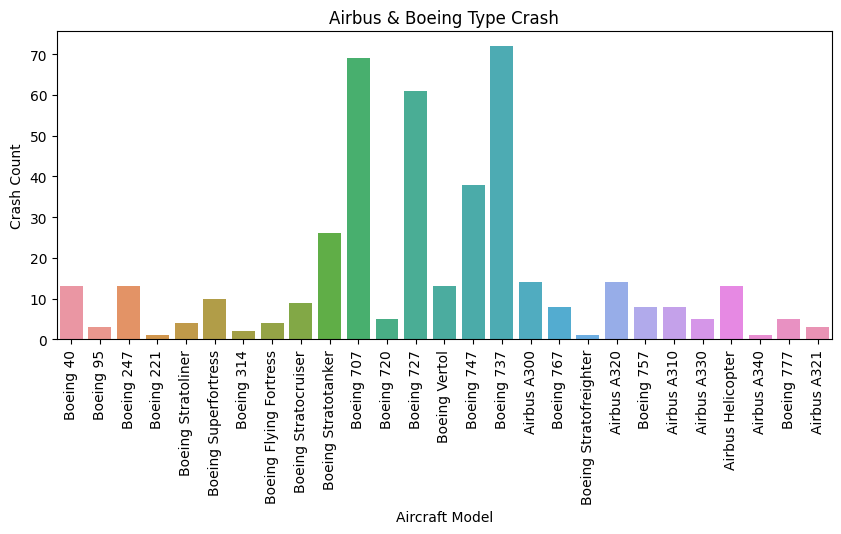

In [43]:
#Crash of aircrafts model
plt.figure(figsize=(10,4))
sns.countplot(data=df_aircrafts, x='Aircraft_Model')
plt.xticks(rotation=90)
plt.title('Airbus & Boeing Type Crash')
plt.xlabel('Aircraft Model')
plt.ylabel('Crash Count');

The Boeing 707 and 737 have the highest number of crashes among Boeing aircraft, while the Airbus A300 and A320 have the highest number of crashes among Airbus aircraft.

In [44]:
#count of the aircrafts based on their models
df_aircrafts.groupby('Manufacturer').Aircraft_Model.value_counts()

Manufacturer  Aircraft_Model        
Airbus        Airbus A300               14
              Airbus A320               14
              Airbus Helicopter         13
              Airbus A310                8
              Airbus A330                5
              Airbus A321                3
              Airbus A340                1
Boeing        Boeing 737                72
              Boeing 707                69
              Boeing 727                61
              Boeing 747                38
              Boeing Stratotanker       26
              Boeing 247                13
              Boeing 40                 13
              Boeing Vertol             13
              Boeing Superfortress      10
              Boeing Stratocruiser       9
              Boeing 757                 8
              Boeing 767                 8
              Boeing 720                 5
              Boeing 777                 5
              Boeing Flying Fortress     4
              Boe

In [45]:
#number of passengers on board of boeing and airbus aircrafts including crew
df_aircrafts.groupby(['Manufacturer'])['Aboard'].sum()

Manufacturer
Airbus     7025.0
Boeing    31577.0
Name: Aboard, dtype: float64

In [46]:
#number of fatalities of boeing and airbus including crew
df_aircrafts.groupby(['Manufacturer'])['Fatalities'].sum()

Manufacturer
Airbus     4072.0
Boeing    19547.0
Name: Fatalities, dtype: float64

In [47]:
#fatalities of boeing and airbus aircrafts based on their models
df_aircrafts.groupby(['Aircraft_Model'])['Fatalities'].sum()

Aircraft_Model
Airbus A300               1435.0
Airbus A310                828.0
Airbus A320               1015.0
Airbus A321                377.0
Airbus A330                339.0
Airbus A340                  0.0
Airbus Helicopter           78.0
Boeing 221                   1.0
Boeing 247                  96.0
Boeing 314                  25.0
Boeing 40                   23.0
Boeing 707                2968.0
Boeing 720                 254.0
Boeing 727                3876.0
Boeing 737                3668.0
Boeing 747                3441.0
Boeing 757                 657.0
Boeing 767                 855.0
Boeing 777                 540.0
Boeing 95                    3.0
Boeing Flying Fortress      87.0
Boeing Stratocruiser       136.0
Boeing Stratofreighter       5.0
Boeing Stratoliner          67.0
Boeing Stratotanker        546.0
Boeing Superfortress       132.0
Boeing Vertol              446.0
Name: Fatalities, dtype: float64

The Airbus A300 and A320 have had the highest number of fatalities among Airbus aircraft, while the Boeing 737 and 727 have had the highest number of fatalities among Boeing aircraft.

In [48]:
airbus = df_aircrafts[df_aircrafts['Manufacturer']=='Airbus']
#airbus_model = airbus.groupby(["Aircraft_Model"])
#airbus_model["Year"].value_counts()

In [49]:
airbus_fatalities = airbus.Fatalities.sum()/airbus.Aboard.sum()*100
print(f"{airbus_fatalities.round(2)}% of passengers on airbus aircraft were fatalities")
print(f"{airbus.Fatalities.sum()} fatalities were from airbus aircrafts")
print(f"{airbus.Aboard.sum()} people were aboard airbus aircrafts")

57.96% of passengers on airbus aircraft were fatalities
4072.0 fatalities were from airbus aircrafts
7025.0 people were aboard airbus aircrafts


In [50]:
boeing = df_aircrafts[df_aircrafts['Manufacturer']=='Boeing']
#boeing_model = boeing.groupby(["Aircraft_Model"])
#boeing_model["Year"].value_counts().head(100)

In [51]:
boeing_fatalities = (boeing.Fatalities.sum()/boeing.Aboard.sum())*100
print(f"{boeing_fatalities.round(2)}% of passengers on boeing aircraft were fatalities")
print(f"{boeing.Fatalities.sum()} fatalities were from boeing aircrafts")
print(f"{boeing.Aboard.sum()} people were aboard boeing aircrafts")

61.9% of passengers on boeing aircraft were fatalities
19547.0 fatalities were from boeing aircrafts
31577.0 people were aboard boeing aircrafts


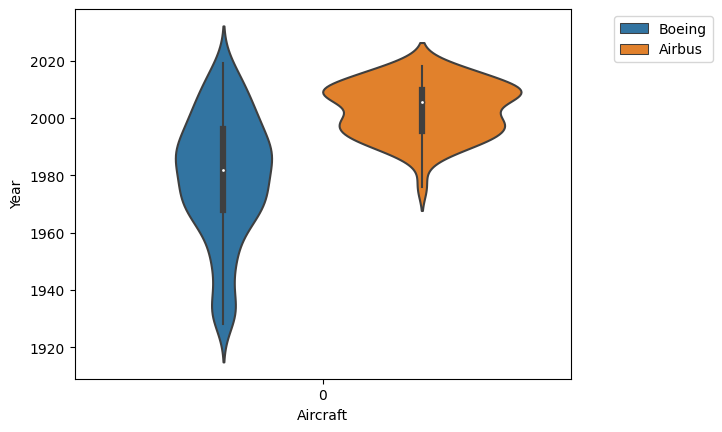

In [52]:
#violinplot to visualise the distribution of Airbus and Boeing accidents
df_aircrafts["Aircraft"] = 0
sns.violinplot(data = df_aircrafts, x="Aircraft", y ="Year",hue="Manufacturer")
plt.legend(bbox_to_anchor=(1.3,1));

The violinplot shows that Airbus had its first accident in 1976, (Airbus commenced operations in May 29th, 1969). Boeing had its first accident in 1928

In [53]:
#bin the year into decades
Aircraft_bins = [1970,1980,1990,2000,2010,2020]
labels = ["1970-1979","1980-1989","1990-1999","2000-2009","2010-2019"]
df_aircrafts["Decade"]=pd.cut(df_aircrafts.Year,Aircraft_bins,labels=labels)

The years 1928 to 1969 were excluded from the analysis since Airbus was not operational during that period. The analysis is focused on Airbus and Boeing.

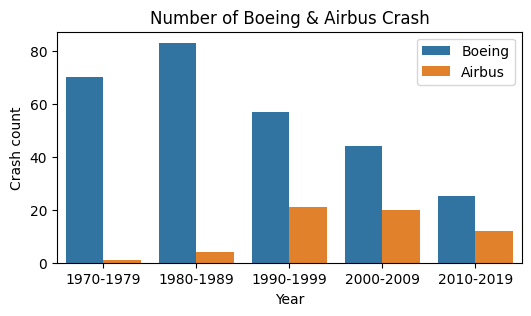

In [57]:
#visualisation of Boeing and Airbus accidents
plt.figure(figsize=(6,3))
sns.countplot(data=df_aircrafts,x='Decade', hue='Manufacturer')
plt.title('Number of Boeing & Airbus Crash')
plt.xlabel('Year')
plt.ylabel('Crash count')
plt.legend(bbox_to_anchor=(1,1));

Boeing had it highest number of accidents between 1980 to 1989, while Airbus had it highest number of accidents between 1990 to 1999

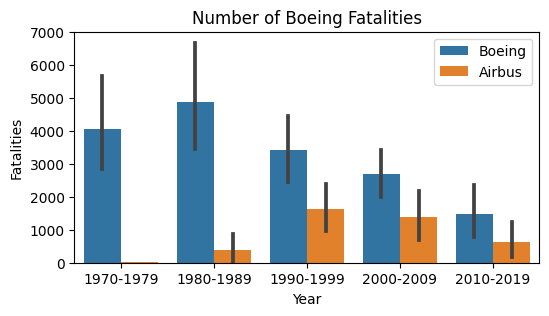

In [58]:
#visualisation of fatalities of Boeing and Airbus accidents
plt.figure(figsize=(6,3))
ax = sns.barplot(x='Decade', y='Fatalities', data=df_aircrafts, estimator=sum, hue='Manufacturer')
plt.title('Number of Boeing Fatalities')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1,1));

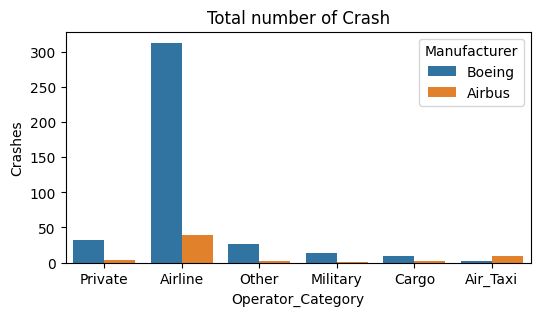

In [59]:
#Distribution of aircrafts accident for each operator category
plt.figure(figsize=(6,3))
sns.countplot(data=df_aircrafts,x='Operator_Category', hue='Manufacturer')
plt.title('Total number of Crash')
plt.ylabel('Crashes');

The visualisation shows that both Airbus and Boeing aircraft that were used by airline had the most accidents

In [62]:
df_aircrafts=df_aircrafts.drop(['Aircraft'], axis = 1)

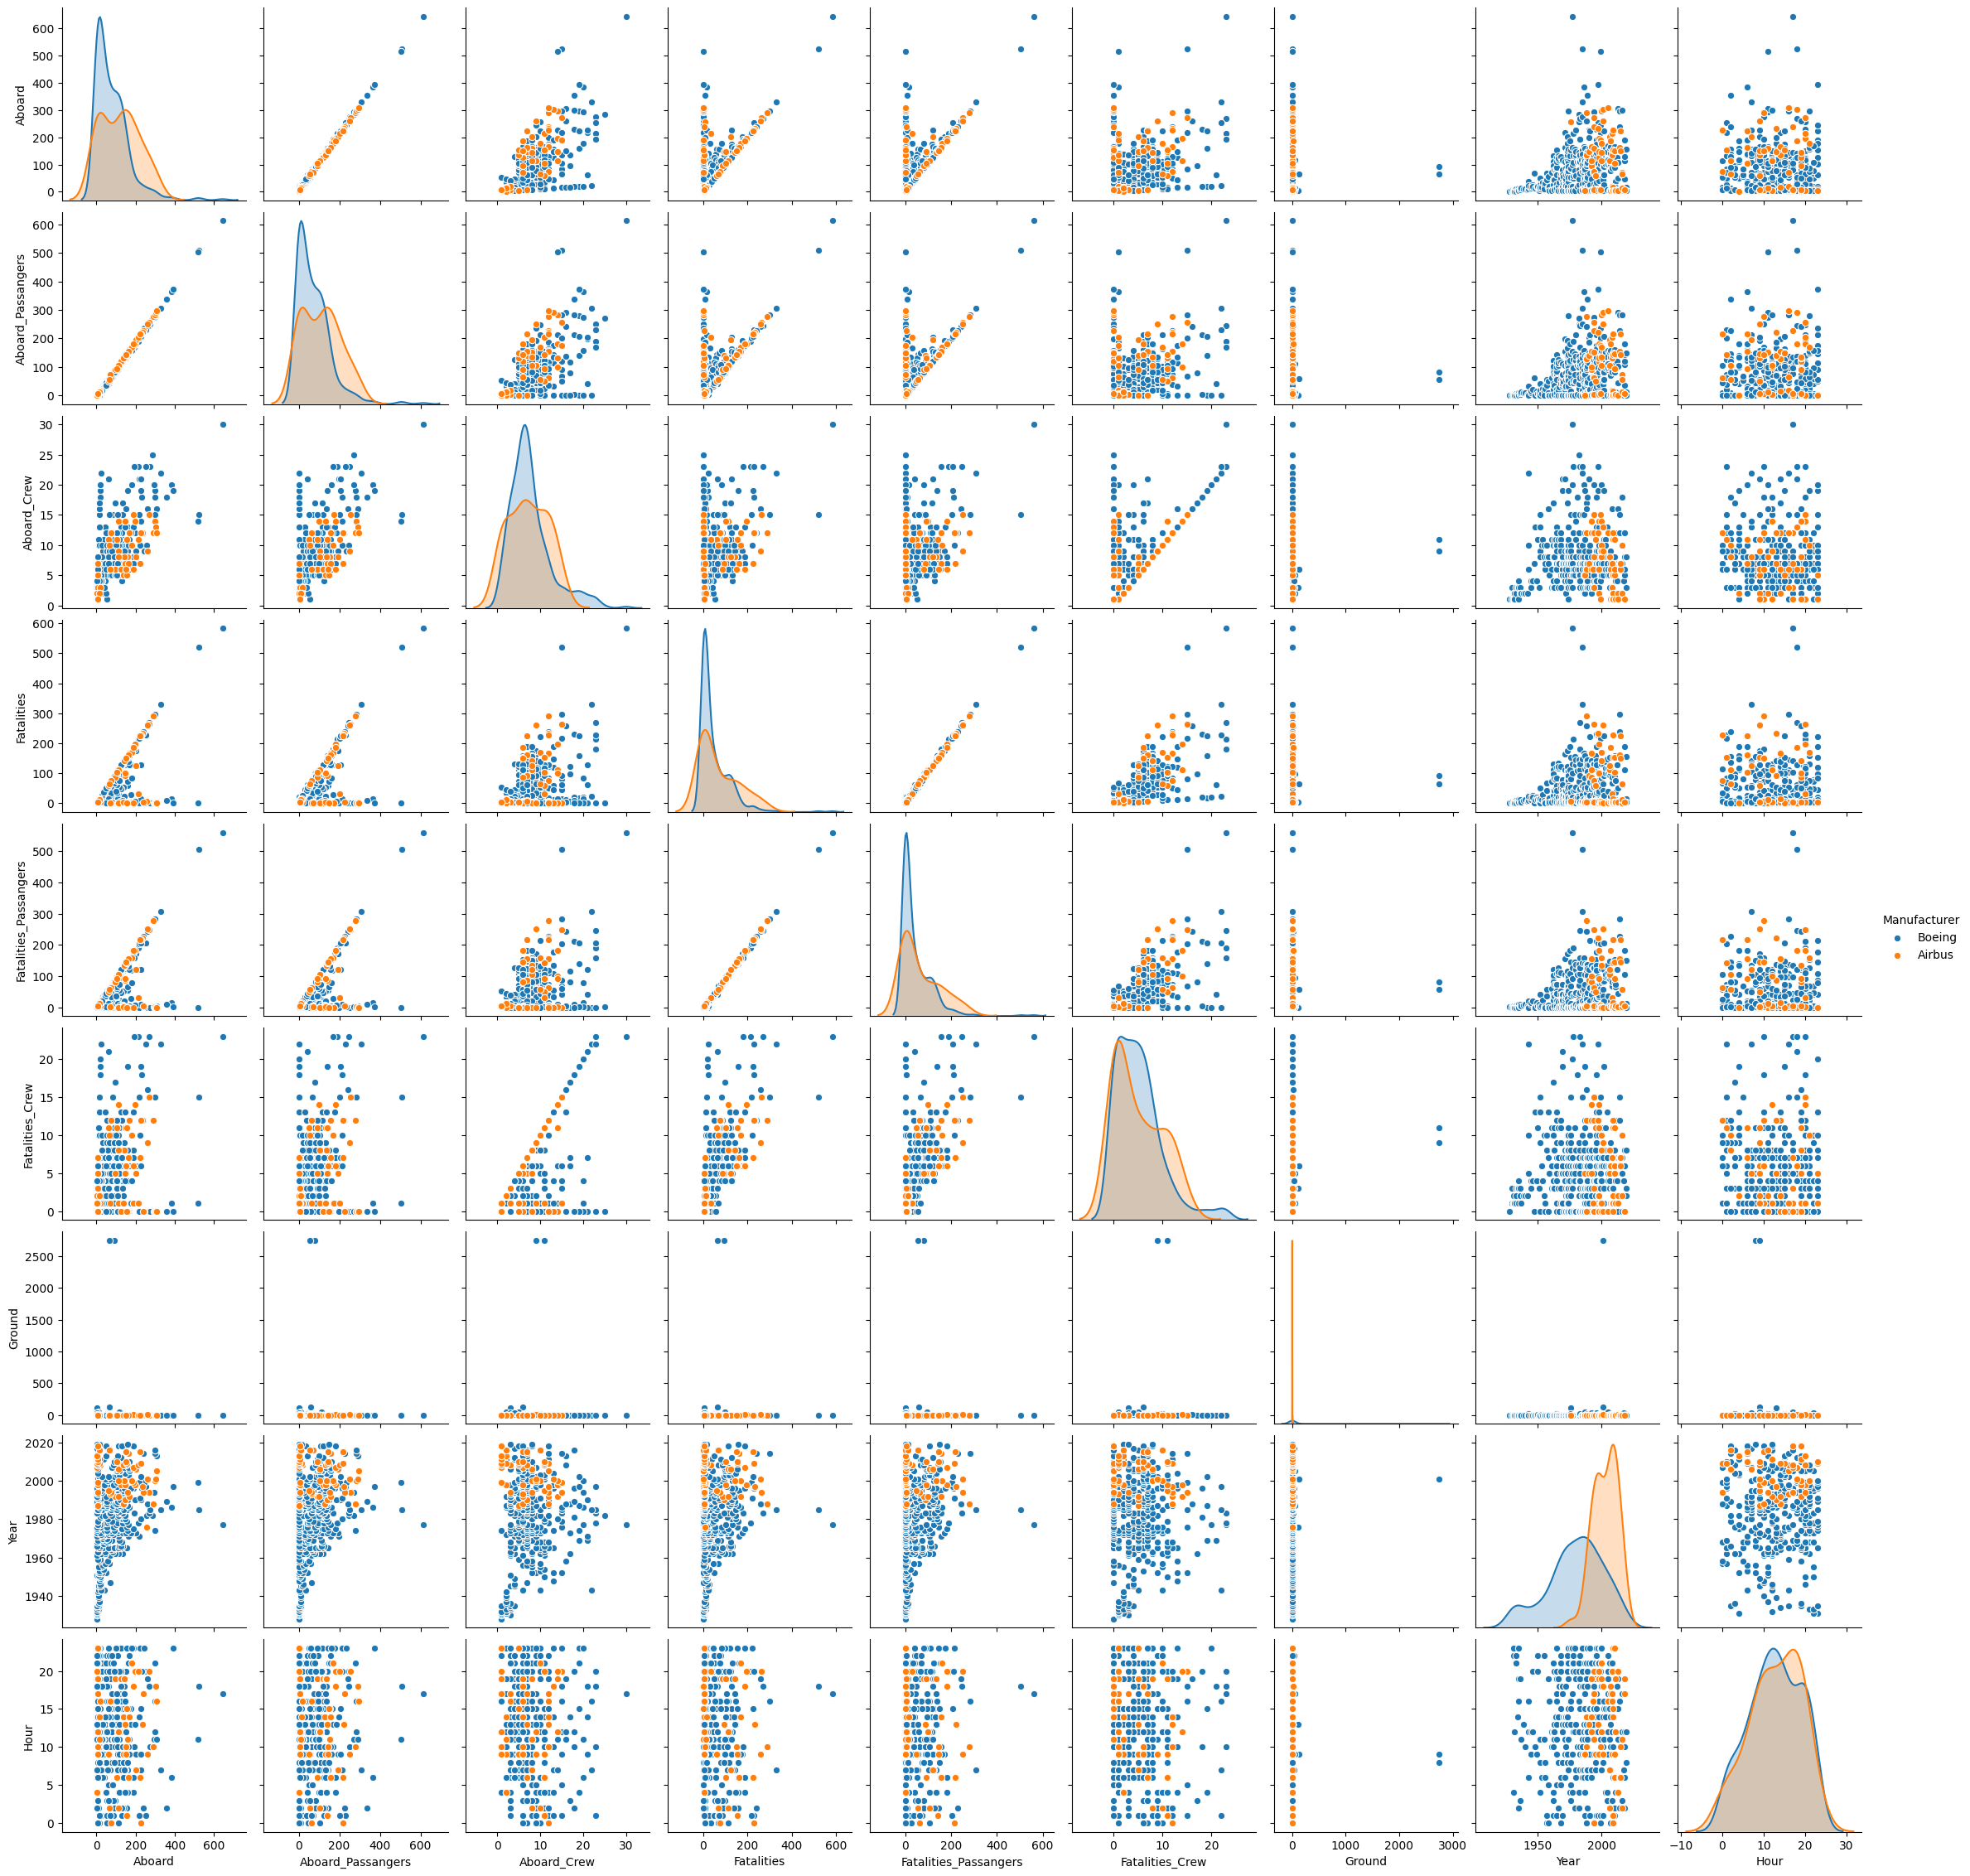

In [64]:
#visualise relationship between numerical variables with manufacturer as the target variable
sns.pairplot(df_aircrafts, hue='Manufacturer');

The pairplot shows that Aboard_Passengers and Aboard_Crew do not give new information, because Aboard is the sum of both variables, same with Fatalities_Crew and Fatalities_Passengers.
Ground variable is an outlier.

In [65]:
df_aircrafts=df_aircrafts.drop(['Aboard_Passangers','Aboard_Crew','Fatalities_Crew','Fatalities_Passangers','Ground'], axis = 1)

#Text Search Analysis

In [8]:
# Set the display option for the "Summary" column
pd.set_option("display.max_colwidth", -1)

# Display the first 10 rows of the "Summary" column
df.Summary.head(10)

0    During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge, 26, who was a passenger. This was the first recorded airplane fatality in history.  One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft.  Orville Wright suffered broken ribs, pelvis and a leg.  Selfridge suffered a crushed skull and died a short time later.
1    Eugene Lefebvre was the first pilot to ever be killed in an air accident, after his controls jambed while flying in an air show.                                                                                                                                                                                                                                                                                                                                                             

In [66]:
#create a new variable to identify the cause of the crash from the summary variable
df_aircrafts["Crash_Cause"]="Unknown"
cause_cats={"Weather":["rain*","storm*","snowstorm*","wind","severe weather","thunderstorm*","turbulence","weather related","haze","weather was poor",
                       "lightning","fog","wind sheer","icing","weather condition*","foggy","headwinds","snow","sunstroke","poor weather","poor weater","inclement weather",
                       "bad weather","low altitude","poor visibility","low visibility","heavy rain*","low cloud*","blizzard","low overcast","mountain wave","downdrafts"],
            "Combat":["shot down","combat","hit by","heavy fighting","shot it"],
            "Collision":["collide","collision"],
            "Unknown":["unknown","never found"],
            "Collision":["Midair collision", "midair collision","collided","collision","impacted"],
            "Pilot_Error":["Pilot error","Negligence","stunting","stunting","standard route","IFR flight","adhere","low pass","opioids",
                           "flight path","intoxicated","pilot's decision","fatigued","disorientation","request bearings"],
            "Technical_Fault":["controls jambed","engine failure","fuel supply","technical problem*","hydraulics","hydraulic failure","experienced a fire","stick shaker","pressure system",
                                 "engine trouble","asymetric fuel","ATC lost radar","Exploded","lost power","losing power","malfunction in the engine","navigation equipment",
                                 "fire erupted","fuel exhaustion","structural failure","tailspin","training","starboard","broken wing strut","broken wire",
                                 "engine fire","engine failed","flight fire","faulty design","malfunctioning controls","engine problem*","propeller","mayday",
                                 "test","hydrogen gas","caught fire","flutter","lost contact","mechanical problem*","distress call","out of fuel","rotor separating","aircraft stalled",
                               "engine * fire", "experimental","refueling","lost control","minor problem*","reported a fire", "triggered","steering hardware","improper loading",
                               "fuel system","autorotation","declared an emergency","fuselage failure","plane stalled","ocillation","erroneous","stalled condition",
                               "wing separated","difficulties","mechanical difficulties","detached","sufficient speed","vertical bank","engine faiure","all engines"],
            "Landing":["emergency landing","landing gear","descent","go-around","lost height","while landing","run off","swamp","attempting to land","attempted to land",
                       "attemptting to land","losing altitude","hard landing","circling"],
            "Takeoff":["approach","takeoff","attempting to take off","taking off","gain* altitude","gaining altitude","lost altitude","take off","took off","liftoff"]
         }

for cause in cause_cats:
  filter=df_aircrafts["Summary"].str.contains('|'.join(cause_cats[cause]),case=False,regex=True,na=False)
  df_aircrafts.loc[filter, "Crash_Cause"] = cause

In [67]:
airbus_cause = df_aircrafts[df_aircrafts['Manufacturer']=='Airbus']
boeing_cause = df_aircrafts[df_aircrafts['Manufacturer']=='Boeing']

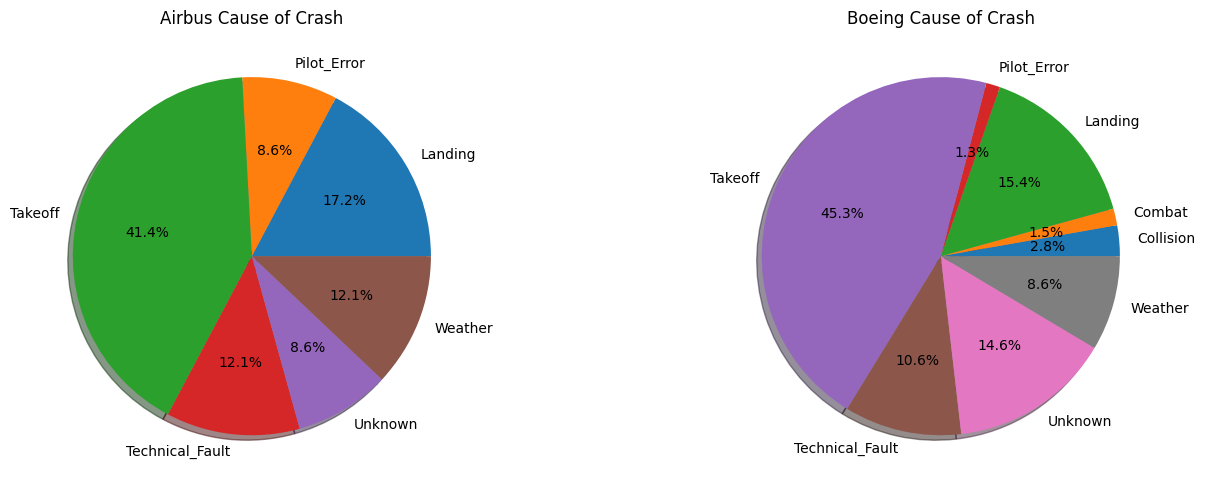

In [70]:
fig, axs = plt.subplots(1,2 ,figsize=(15, 5))
#df_aircrafts.groupby("Crash_Cause").size().plot.pie(ax=axs[0],autopct='%0.1f%%',shadow=True,  title="Cause of Crash")
airbus_cause.groupby("Crash_Cause").size().plot.pie(ax=axs[0],autopct='%0.1f%%',shadow=True,  title="Airbus Cause of Crash")
boeing_cause.groupby("Crash_Cause").size().plot.pie(ax=axs[1],autopct='%0.1f%%',shadow=True,  title="Boeing Cause of Crash")
plt.tight_layout()
plt.show()

41% of Airbus crash was during takeoff, while Boeing is 45.3%

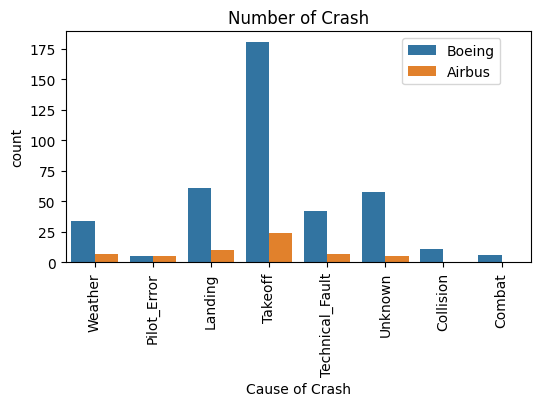

In [82]:
plt.figure(figsize=(6,3))
ax = sns.countplot(x='Crash_Cause', data=df_aircrafts, hue='Manufacturer')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.95,1))
plt.xlabel('Cause of Crash')
plt.title('Number of Crash');

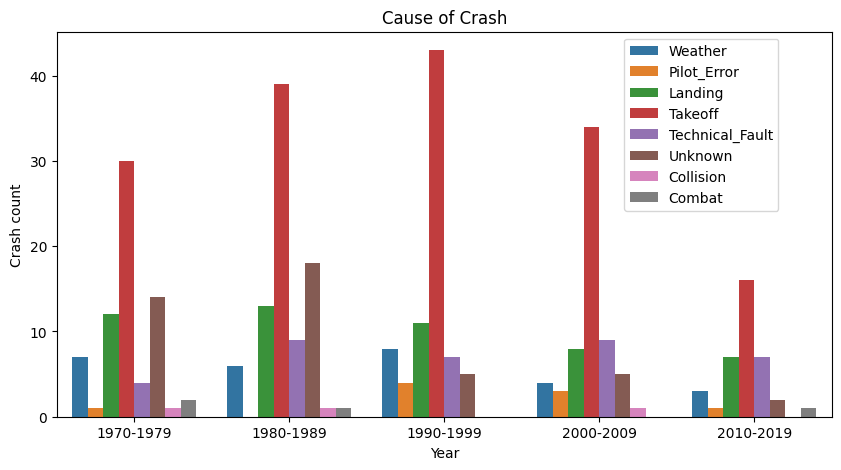

In [88]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_aircrafts,x='Decade', hue='Crash_Cause')
plt.title('Cause of Crash')
plt.xlabel('Year')
plt.ylabel('Crash count')
plt.legend(bbox_to_anchor=(0.94,1));

#Geospatial Analysis

In [89]:
!pip install geopy

In [90]:
!git clone https://github.com/DenisCarriere/geocoder
%cd geocoder

Cloning into 'geocoder'...
remote: Enumerating objects: 6713, done.
remote: Total 6713 (delta 0), reused 0 (delta 0), pack-reused 6713
Receiving objects: 100% (6713/6713), 2.14 MiB | 5.51 MiB/s, done.
Resolving deltas: 100% (4289/4289), done.
/content/geocoder


In [91]:
!python setup.py install

/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
 

In [92]:
%pip install --upgrade folium

import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy import distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: folium
    Found existing installation: folium 0.14.0
    Uninstalling folium-0.14.0:
      Successfully uninstalled folium-0.14.0


In [93]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from folium import plugins
folium.__version__

'0.15.0'

In [94]:
geolocator = Nominatim(user_agent="geoapiExercises")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=3)

In [95]:
df_aircrafts["latitude"]=df_aircrafts["Coordinates"].apply(lambda loc: loc.latitude if isinstance(loc, geopy.location.Location) else None)
df_aircrafts["longitude"]=df_aircrafts["Coordinates"].apply(lambda loc: loc.longitude if isinstance(loc, geopy.location.Location) else None)

In [96]:
df_aircrafts.dropna(subset=['latitude','longitude'], inplace = True)

In [107]:
m = folium.Map([13.752544, 100.493473], tiles='CartoDB Positron', zoom_start=5, attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.')
mc = MarkerCluster().add_to(m)

In [108]:
for i, row in df_aircrafts.iterrows():

  lat = df_aircrafts.at[i,'latitude']
  lon = df_aircrafts.at[i,'longitude']
  crash_site = df_aircrafts.at[i, 'Location']

  if row["Manufacturer"]=="Boeing":

    symbol=folium.Icon(color="blue", icon = "plane", prefix = "fa")
  else:
    symbol = folium.Icon(color="red", icon = "plane", prefix ="fa" )

  folium.Marker(location=[lat,lon],popup=crash_site, tooltip="click", icon = symbol).add_to(mc)

In [109]:
m

In [110]:
m = folium.Map([13.752544, 100.493473], tiles = 'CartoDB Positron', zoom_start=5)

maps = df_aircrafts[['latitude', 'longitude', 'Fatalities']]

heat_map = [[row['latitude'], row['longitude'], row['Fatalities']]for index, row in maps.iterrows()]

HeatMap(heat_map).add_to(m)

In [111]:
m

In [112]:
def draw_route(df_aircrafts):
  map = folium.Map([0, 0], zoom_start=2, control_scale=True, tiles ='CartoDB Positron')
  colorCode_AC={"Boeing":"red","Airbus":"blue"}
  for i,row in df_aircrafts.iterrows():
    if isinstance(row["Route_Coordinates"], list):
      tooltip=f'Route: {row["Route"]}'
      popup=f'Date: {row["Date"]}\n\nAC_Type: {row["AC_Type"]}'
      color=colorCode_AC.get(row["Manufacturer"],"green")
      plugins.AntPath([(x.latitude,x.longitude) for x in row["Route_Coordinates"]], color=color,tooltip=tooltip,popup=popup, weight=2, opacity=0.5).add_to(map)
  return map

In [113]:
map=draw_route(df_aircrafts.tail(100))
map

In [114]:
region={"Africa":["Egypt","Egyptian", "Nigeria", "Kenya", "Morocco", "Zambia", "Angola", "Cameroon", "Ivory Coast", "Mauritius", "Ethiopia", "Libya", "Comoros", "Congo", "Tunisia", "Bangui", "Algeria",
                  "Sudan", "Benin", "Ghana", "Uganda", "Somalia"],
            "North America":["Nebraska", "Pacific Ocean", "Wyoming", "Alaska", "California", "New York", "Washington", "Missouri", "Pennsylvania", "West Indies", "Utah","Florida","Ohio","Maryland",
                       "Kansas", "Oregon", "Antigua", "Kentucky", "Colorado", "Utah", "Ohio", "Indiana", "North Carolina", "Illinois", "New Jersey", "Columbia", "Virgin Islands","Texas", "Virginia",
                        "Mexico","Michigan", "Florida", "Canada",  "Massachusetts", "Hawaii", "Panama", "Louisiana", "Newfoundland", "North Atlantic", "Honduras",
                        "Guam", "Arizona", "Dominican", "Mariana Islands", "Cuba", "Samoa", "Micronesia", "Alabama", "Honolulu"],
        "South American":["Peru", "Colombia","Bolivia", "Ecuador", "Brazil", "El Salvador", "Guyana", "Argentina", "Venezuela"],
            "Asia":["Japan", "Kyrgyzstan", "Philippines", "Sharjah", "Vietnam", "Lebanon", "Taiwan", "Dubai",  "Indian Ocean", "India", "Bahrain", "Indonesia", "Java Sea", "Khmer", "Saudia Arabia",
                    "Iran", "Malaysia", "Thailand", "Qatar", "South Korea*", "UAE", "Yemen", "Pakistan", "Andaman Sea", "China", "Azerbaijan", "Afghanistan", "Nepal"],
            "Europe":["Portugal", "Poland", "Italy", "Romania", "England", "Norway", "Scotland", "Azores", "Belgium", "Germany", "France", "Switzerland", "Tahiti", "Greece", "Spain", "Turkey", "Canary Islands",
                      "Russia", "Ireland", "Malta", "Chile", "Cyprus", "Netherlands","Croatia", "United Kingdom", "Ukraine"]

         }

for reg in region:
  filter=df_aircrafts["Location"].str.contains('|'.join(region[reg]),case=False,regex=True,na=False)
  df_aircrafts.loc[filter, "Region"] = reg

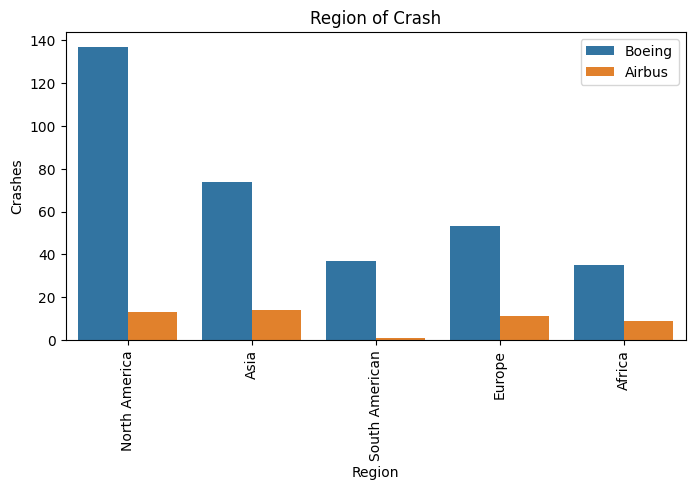

In [116]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_aircrafts,x='Region', hue='Manufacturer')
plt.title('Region of Crash')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Crashes')
plt.legend(bbox_to_anchor=(1,1));

In [117]:
cause_region = df_aircrafts.groupby("Crash_Cause").Region.value_counts()
cause_region

Crash_Cause      Region        
Collision        North America      6
                 Asia               1
                 Europe             1
                 South American     1
Combat           Asia               1
                 Europe             1
Landing          North America     20
                 Asia              18
                 Europe            13
                 South American     7
                 Africa             6
Pilot_Error      North America      4
                 Asia               3
                 Europe             2
Takeoff          North America     62
                 Asia              41
                 Africa            29
                 Europe            27
                 South American    20
Technical_Fault  North America     18
                 Asia               9
                 Europe             5
                 South American     5
                 Africa             3
Unknown          North America     26
                 E

In [118]:
weather = df_aircrafts[df_aircrafts['Crash_Cause']=='Weather']
weather_cause = weather.groupby(["Region"])
weather_cause["Fatalities"].sum()

Region
Africa            10.0
Asia             377.0
Europe           371.0
North America    130.0
Name: Fatalities, dtype: float64

In [119]:
weather_fatalities = weather.Fatalities.sum()/df_aircrafts.Fatalities.sum()*100
print(weather_fatalities.round(2))
weather.Fatalities.sum()

4.6


888.0

In [120]:
tf = df_aircrafts[df_aircrafts['Crash_Cause']=='Technical_Fault']
tf_cause = tf.groupby(["Region"])
tf_cause["Fatalities"].sum()

Region
Africa            179.0
Asia              371.0
Europe            476.0
North America     412.0
South American    206.0
Name: Fatalities, dtype: float64

In [121]:
tf_fatalities = tf.Fatalities.sum()/df_aircrafts.Fatalities.sum()*100
print(tf_fatalities.round(2))
tf.Fatalities.sum()

8.51


1644.0

In [122]:
cause = ["Weather", "Technical_Fault"]
df_cause = df_aircrafts[df_aircrafts["Crash_Cause"].isin(cause)]

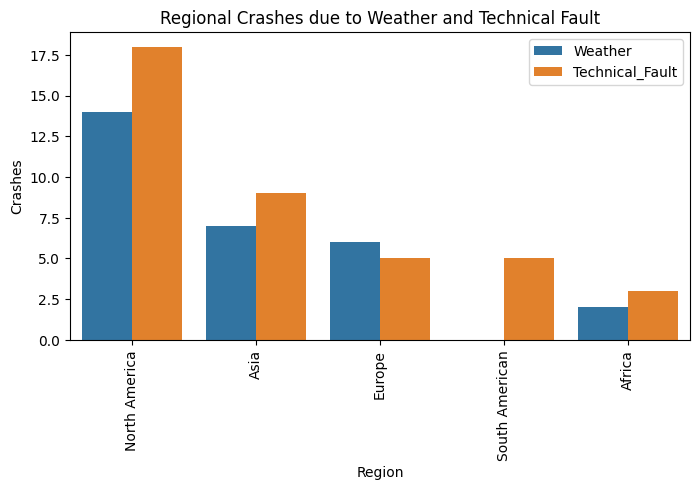

In [123]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_cause,x='Region', hue='Crash_Cause')
plt.title('Regional Crashes due to Weather and Technical Fault')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Crashes')
plt.legend(bbox_to_anchor=(1,1));

In [142]:
w = folium.Map([0,0], tiles = 'CartoDB Positron', zoom_start=2,  control_scale=True)

In [143]:
for i, row in df_cause.iterrows():

  w_lat = df_cause.at[i,'latitude']
  w_lon = df_cause.at[i,'longitude']
  crash_region = df_cause.at[i, 'Region']

  if row["Crash_Cause"]=="Weather":

    icon=folium.Icon(color="lightblue", icon = "cloud", prefix = "fa")
  else:
    icon = folium.Icon(color="lightred", icon = "exclamation", prefix ="fa" )

  folium.Marker(location=[w_lat,w_lon],popup=crash_region, tooltip="click", icon = icon).add_to(w)

In [144]:
w